In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime
import numpy as np
from scipy import stats


In [255]:
df = pd.read_csv('SBAnational.csv')
df

/tmp/ipykernel_4831/3498453600.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [230]:
df['ApprovalDate'].sort_values().unique()

array(['9-Sep-96', '9-Sep-97', '9-Sep-98', '9-Sep-99'], dtype=object)

In [4]:
# le nombre de banques 

len(df['Bank'].unique())

5803

In [5]:
# nombre d'états des banques qui sont étudiées

len(df['BankState'].unique())

57

In [6]:
# LE nombre de secteurs d'activité

len(df['NAICS'].astype(str).str.slice(0,2).unique())

25

In [7]:
# nb états des clients

len(df['State'].unique())

52

In [8]:
df['RetainedJob'].unique()

array([   0,    7,   23,    4,    6,    1,    9,   20,    2,    5,   19,
          8,    3,   10,   24,   12,   15,   11,   25,   44,   17,   14,
         65,   28,   38,   16,   42,   26,   18,   13,   50,   93,   40,
         37,   60,   21,   30,   31,   34,   35,  150,   22,   73,   41,
         45,  100,  180,   58,   75,  165,   36,  130,   29,   27,  125,
         99,   46,   32,  257,   43,   47,   80,   70,   54,   62,   33,
         39,  400,   55,   95,   48,  120,   71,   63,   81,   52,   94,
         78,  160,  109,   86,   77,  155,   85,   90,   64, 3225,   61,
         69,   66,  210,  107,   97,   51,   83,  112,   53,   72,   76,
         87,   68,  118,  138,   67,   57,   56,  117,  171,  229,  115,
        275,  153,  300,  105,  140,  135,   59,   79,  200,  295,  205,
        206,  128,  186,  137,  250,   89,   49,  131,   92,  404,  110,
        320,  139,   82,  108,   88,  104,  114,  134,  230,  102,  103,
         96,   98,   84,  101,  220,  233,   74,  2

In [9]:
df.nunique()

LoanNr_ChkDgt        899164
Name                 779583
City                  32581
State                    51
Zip                   33611
Bank                   5802
BankState                56
NAICS                  1312
ApprovalDate           9859
ApprovalFY               70
Term                    412
NoEmp                   599
NewExist                  3
CreateJob               246
RetainedJob             358
FranchiseCode          2768
UrbanRural                3
RevLineCr                18
LowDoc                    8
ChgOffDate             6448
DisbursementDate       8472
DisbursementGross    118859
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83165
GrAppv                22128
SBA_Appv              38326
dtype: int64

In [10]:
df.duplicated()[df.duplicated() == True]

Series([], dtype: bool)

In [187]:
df


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [325]:
df_2 = df.copy()

#Création de la colonne categorie activité
df_2['cat_activites'] = df['NAICS'].map(lambda x: str(x)[:2])

#Remplace les années avec 1976A par 1976 et passage en INT

df_2.replace('1976A',1976, inplace= True)
df_2['ApprovalFY'] = pd.to_numeric(df_2['ApprovalFY'])

# supprime le dollar et formate
df_2['SBA_loan_float'] = df_2['SBA_Appv'].map(lambda x : float(x[1:].replace(',','')))
df_2['bank_loan_float'] = df_2['GrAppv'].map(lambda x : float(x[1:].replace(',','')))


# Nettoyage de la colonne lowdoc le programme a été créé en 1993 avec les condtions d'être en dessous de 150000 dollars de prêt
df_2['LowDoc'] = df_2.apply(
    lambda row: row['LowDoc'] if row['LowDoc'] in ['Y', 'N']
    else ('N' if row['ApprovalFY'] < 1993 else ('N' if row['bank_loan_float'] > 150000 else 'Y')), axis=1)


# Formatage et de nettoyage de la colonne Approuval Date
# Modifier les années en fonction de la condition
df_2['ApprovalDate'] = df_2['ApprovalDate'].map(
    lambda x: x.replace(x[-3:], '-19' + x[-2:]) if int(x[-2:]) >= 50 else x.replace(x[-3:], '-20' + x[-2:])
)
df_2['ApprovalDate'] = pd.to_datetime(df_2['ApprovalDate'])
# df_2['ApprovalDate'] = df_2['ApprovalDate'].map(lambda x : date(year = x.year,month = x.month, day = x.day ))


df_2.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate                   object
DisbursementDate             object
DisbursementGross            object
BalanceGross                 object
MIS_Status                   object
ChgOffPrinGr                 object
GrAppv                       object
SBA_Appv                     object
cat_activites               

In [13]:
df_2[df_2['NAICS'] == 0]

#200K plus lignes qui ont un NAICS qui est de 0

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00",0
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,...,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",0
13,1000154010,"ORCHARD CAFE & BAKERY, INC.",SLATERSVILLE,RI,2876,CITIZENS BANK NATL ASSOC,RI,0,28-Feb-97,1997,...,N,NaN,31-May-97,"$370,000.00",$0.00,P I F,$0.00,"$370,000.00","$277,500.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899153,9995413002,NORTH SHORE FLORAL,WOODBURY,NY,11797,FLUSHING BANK,NY,0,27-Feb-97,1997,...,N,7-Jul-04,31-May-97,"$142,000.00",$0.00,CHGOFF,$0.00,"$142,000.00","$106,500.00",0
899154,9995423005,"LITWIN LIVERY SERVICES, INC.",CAMPBELL,OH,44405,JPMORGAN CHASE BANK NATL ASSOC,IL,0,27-Feb-97,1997,...,N,NaN,30-Sep-97,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",0
899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,27-Feb-97,1997,...,Y,NaN,30-Jun-97,"$79,000.00",$0.00,P I F,$0.00,"$79,000.00","$63,200.00",0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0


In [95]:
from datetime import datetime

df_2['dif_days_aproved_received'] = pd.to_datetime(df_2['DisbursementDate']) - pd.to_datetime(df_2['ApprovalDate'])

df_2

/tmp/ipykernel_4831/984317455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2['dif_days_aproved_received'] = pd.to_datetime(df_2['DisbursementDate']) - pd.to_datetime(df_2['ApprovalDate'])
/tmp/ipykernel_4831/984317455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2['dif_days_aproved_received'] = pd.to_datetime(df_2['DisbursementDate']) - pd.to_datetime(df_2['ApprovalDate'])


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float,dif_days_aproved_received
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,48000.0,60000.0,730 days
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,32000.0,40000.0,92 days
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,215250.0,287000.0,306 days
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0,122 days
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0,75 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",45,56000.0,70000.0,215 days
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",45,42500.0,85000.0,246 days
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",33,225000.0,300000.0,215 days
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0,32 days


In [86]:

df_2['ratio_SBA_bank'] = df_2['SBA_Appv'].map(lambda x : float(x[1:].replace(',',''))) / df_2['GrAppv'].map(lambda x : float(x[1:].replace(',','')))
df_2

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,dif_days_aproved_received,ratio_SBA_bank
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,730 days,0.80
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,92 days,0.80
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,306 days,0.75
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,122 days,0.80
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,75 days,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",45,215 days,0.80
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",45,246 days,0.50
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",33,215 days,0.75
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,32 days,0.80


In [16]:
# Suppression des lignes où le NewExist est égale à 0

df_2 = df_2[df_2['NewExist'] != 0]

In [17]:
#NB EST LA TABLE D'un group by entre mis status et newexist au final la donnée sur newexiste n'est pas pertinente

nb_mis = df_2.groupby(['MIS_Status', 'NewExist'])['NewExist'].count().reset_index(name='count')


nb_mis['ratio'] = nb_mis.apply(lambda row: 
                               row['count'] / nb_mis[nb_mis['MIS_Status'] == 'CHGOFF']['count'].sum() 
                               if row['MIS_Status'] == 'CHGOFF' 
                               else row['count'] / nb_mis[nb_mis['MIS_Status'] == 'P I F']['count'].sum(), 
                               axis=1)

nb_mis

,MIS_Status,NewExist,count,ratio
0,CHGOFF,1.0,110114,0.699221
1,CHGOFF,2.0,47367,0.300779
2,P I F,1.0,533332,0.722159
3,P I F,2.0,205192,0.277841


In [18]:
df_2['MIS_Status'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
899159    False
899160    False
899161    False
899162    False
899163    False
Name: MIS_Status, Length: 898130, dtype: bool

In [19]:
len(df_2['Zip'].astype(str).str[:2].unique())

100

In [43]:
pd.to_numeric(df_2['ApprovalFY'][df_2['ApprovalFY'] != '1976A']).sort_values().unique()



array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [52]:
df_2.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'cat_activites', 'dif_days_aproved_received', 'ratio_SBA_bank'],
      dtype='object')

In [ ]:
df_2_annee_MIS = df_2[['ApprovalFY', 'MIS_Status']]


df_2_annee_MIS_group = df_2_annee_MIS.groupby(['ApprovalFY','MIS_Status']).size()

df_2_annee_MIS_group_df = pd.DataFrame(df_2_annee_MIS_group).reset_index()
df_2_annee_MIS_group_df.columns = ['years', 'status','nb']
# Définir les intervalles de gravité des crises économiques
bins = [1968, 1972, 1979, 1991, 1997, 2002, 2008, 2014]
labels = ['Faible', 'Modéré', 'Moins grave', 'Modéré', 'Grave', 'Faible', 'Très grave']

# Appliquer pd.cut() pour classer les années selon les intervalles
df_2_annee_MIS_group_df['Crise Économique'] = pd.cut(df_2_annee_MIS_group_df['years'], bins=bins, labels=labels, right=False, ordered=False)

pd.set_option('display.max_rows', 120)
df_2_annee_MIS_group_df.head(118)

,years,status,nb,Crise Économique
0,1966,CHGOFF,1,NaN
1,1968,CHGOFF,1,Faible
2,1969,CHGOFF,2,Faible
3,1969,P I F,1,Faible
4,1970,CHGOFF,7,Faible
5,1970,P I F,1,Faible
6,1971,CHGOFF,18,Faible
7,1972,CHGOFF,21,Modéré
8,1972,P I F,4,Modéré
9,1973,CHGOFF,45,Modéré


<Axes: xlabel='years', ylabel='nb'>

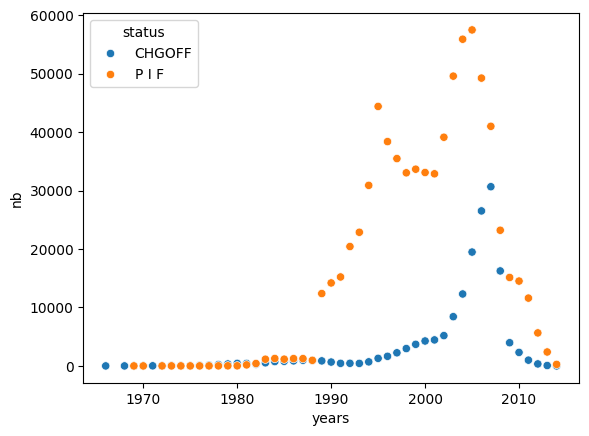

In [94]:
sns.scatterplot(x = "years", 
                y = "nb", 
                data = df_2_annee_MIS_group_df, 
                hue = "status")

<Axes: xlabel='years', ylabel='total_loan_bank'>

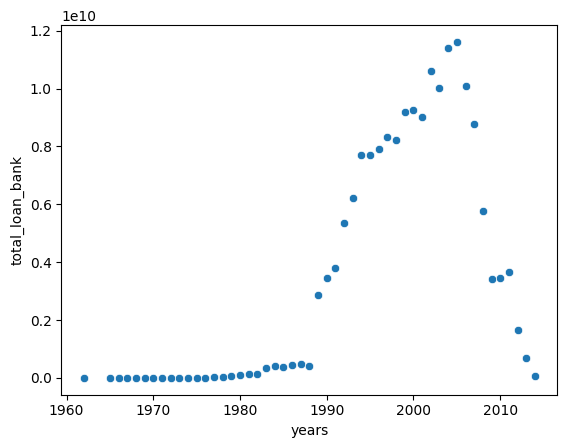

In [100]:
df_2_sum_years = df_2.groupby('ApprovalFY')['bank_loan_float'].sum()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'total_loan_bank']

sns.scatterplot(x = "years", 
                y = "total_loan_bank", 
                data = df_2_sum_years, 
                #hue = "status"
                )



<Axes: xlabel='years', ylabel='total_loan_SBA'>

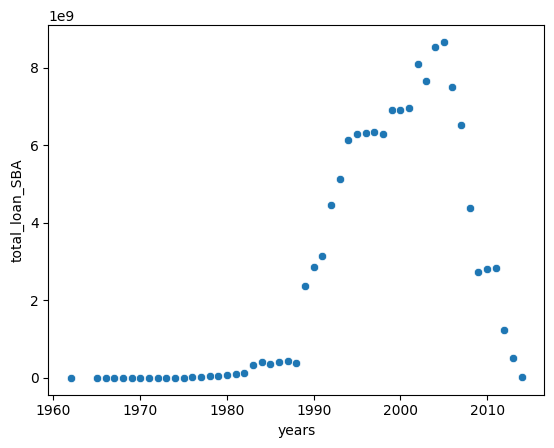

In [101]:
df_2_sum_years = df_2.groupby('ApprovalFY')['SBA_loan_float'].sum()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'total_loan_SBA']

sns.scatterplot(x = "years", 
                y = "total_loan_SBA", 
                data = df_2_sum_years, 
                #hue = "status"
                )


<Axes: xlabel='years', ylabel='nb_ApprovalFY'>

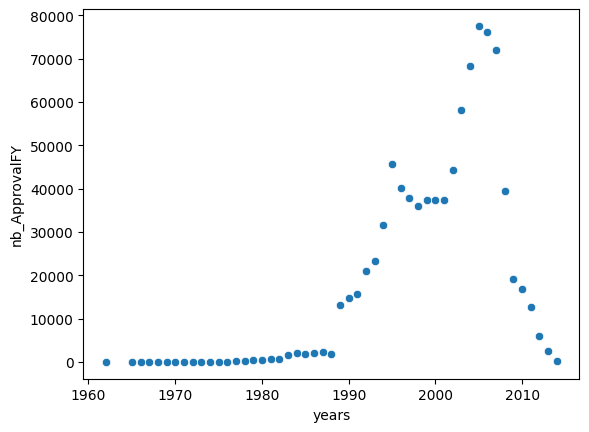

In [103]:
df_2_sum_years = df_2.groupby('ApprovalFY')['SBA_loan_float'].count()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'nb_ApprovalFY']

sns.scatterplot(x = "years", 
                y = "nb_ApprovalFY", 
                data = df_2_sum_years, 
                #hue = "status"
                )


### Sur l'augmentation des crédits fin des années 80

Consolidation des prêts garantis par le gouvernement : Les programmes de prêts garantis par la Small Business Administration (SBA) ont été renforcés dans les années 1980. Ces programmes permettaient de réduire les risques pour les prêteurs privés, rendant ainsi les crédits plus accessibles aux petites entreprises, même si elles étaient jugées plus risquées par les institutions financières.

### Baisse des prêts après la crise des subprimes 

2. Renforcement des régulations bancaires (loi Dodd-Frank) :

Après la crise financière de 2008, le gouvernement américain a mis en place de nouvelles régulations pour stabiliser le système financier et éviter de futures crises. La loi Dodd-Frank (2010) a notamment imposé des exigences strictes en matière de capital, de liquidité et de transparence pour les banques. Ces nouvelles régulations ont accru la charge administrative et le coût de l'octroi de crédits pour les banques, les incitant à se concentrer davantage sur des prêts jugés moins risqués et plus rentables. Les petites entreprises, souvent perçues comme plus vulnérables, ont donc eu plus de mal à obtenir des financements.

In [108]:
df_2['LowDoc'][(df_2['LowDoc'] != 'Y') & (df_2['LowDoc']!= 'N')].unique()

array(['C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [321]:
df_2['LowDoc'] = df_2['LowDoc'].apply(lambda x : x if x == 'Y' or x == 'N' else 'N' if x['ApprovalFY'] <= 1993 else 'N' if x['bank_loan_float']> 150000 else 'Y')

df_2['LowDoc'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
# Assurez-vous que les colonnes 'Lowdoc' et 'MIS_Status' sont de type catégoriel
low_d= df_2['LowDoc'].astype('category')
status_d= df_2['MIS_Status'].astype('category')

# Créez un tableau de contingence entre les deux variables
contingency_table = pd.crosstab(low_d, status_d)

In [337]:
contingency_table

MIS_Status,CHGOFF,P I F
LowDoc,,
N,146306,636927
Y,11252,102682


In [338]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Statistique Chi-2:", chi2)
print("Degrés de liberté:", dof)
print("P-value:", p)
print("Tableau des valeurs attendues :\n", expected)

Statistique Chi-2: 5324.413151338364
Degrés de liberté: 1
P-value: 0.0
Tableau des valeurs attendues :
 [[137549.2244075 645683.7755925]
 [ 20008.7755925  93925.2244075]]


In [346]:
df_2['MIS_Status'].isna().sum()

np.int64(1997)

In [354]:
df_2_chi2 = df_2[['State', 'NAICS','UrbanRural','LowDoc','MIS_Status']]

for column in df_2_chi2.columns:
    df_var = df_2_chi2[column].astype('category')
    df_cible = df_2_chi2['MIS_Status'].astype('category')
    contingency_table = pd.crosstab(df_var, df_cible)

    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f'le résultat pour {column}')
    print("Statistique Chi-2:", chi2)
    print("Degrés de liberté:", dof)
    print("P-value:", p)
    print("Tableau des valeurs attendues :\n", expected)
    print('')
    print('================================================================================')

le résultat pour State
Statistique Chi-2: 11163.87470891073
Degrés de liberté: 50
P-value: 0.0
Tableau des valeurs attendues :
 [[   422.00900626   1980.99099374]
 [  1468.16283492   6891.83716508]
 [  1112.18603272   5220.81396728]
 [  3095.08394768  14528.91605232]
 [ 22915.98468936 107572.01531064]
 [  3617.37058298  16980.62941702]
 [  2129.71419845   9997.28580155]
 [   283.27113071   1329.72886929]
 [   385.12931782   1807.87068218]
 [  7234.0386957   33957.9613043 ]
 [  3911.35438509  18360.64561491]
 [   633.4525533    2973.5474467 ]
 [  2104.95212193   9881.04787807]
 [  1667.66438761   7828.33561239]
 [  5197.22618859  24396.77381141]
 [  2472.51968335  11606.48031665]
 [  2011.69919546   9443.30080454]
 [  1355.76759397   6364.23240603]
 [  1680.66008734   7889.33991266]
 [  4406.59591553  20685.40408447]
 [  2328.51328089  10930.48671911]
 [  1042.64147738   4894.35852262]
 [  3598.93073876  16894.06926124]
 [  4277.86824113  20081.13175887]
 [  3626.85393143  17025.1460685

In [360]:
df_var = df_2_chi2['State'].astype('category')
df_cible = df_2_chi2['MIS_Status'].astype('category')
contingency_table = pd.crosstab(df_var, df_cible)
contingency_table['ratio'] = contingency_table['CHGOFF'] / (contingency_table['CHGOFF'] + contingency_table['P I F'])
contingency_table.sort_values(by = 'ratio', ascending=False)

MIS_Status,CHGOFF,P I F,ratio
State,,,
FL,11274,29918,0.273694
DC,387,1226,0.239926
GA,5337,16935,0.239628
NV,1863,6159,0.232236
IL,6709,22885,0.226701
MI,4612,15881,0.225052
TN,1994,7406,0.212128
AZ,3657,13967,0.207501
SC,1145,4450,0.204647
